<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/19_1_%EC%98%88%EC%A0%9C_%EC%A0%95%ED%99%95%EB%8F%84_%EB%86%92%EC%97%AC%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fasion mnist 정확도를 향상 시켜봅시다

In [ ]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']               

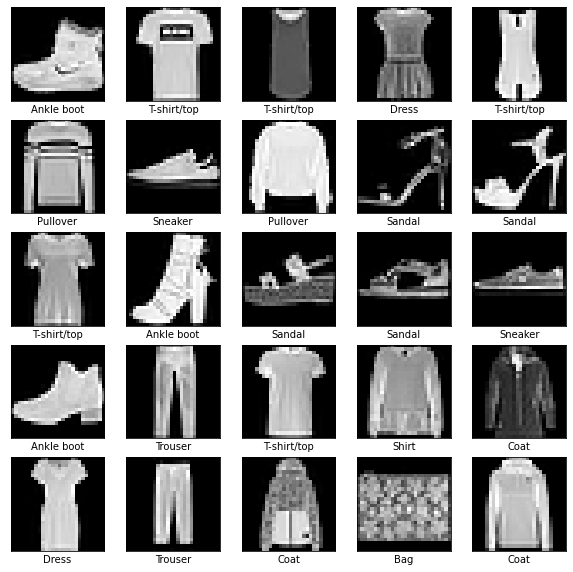

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train/255
x_test = x_test/255

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

epochs = 20
history = model.fit(x_train, y_train, batch_size=64,
          epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

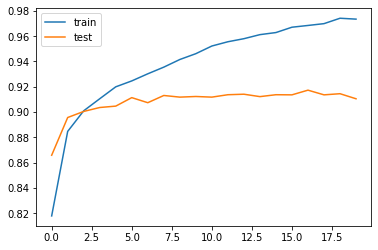

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred = y_pred.argmax(axis = 1)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_true = y_test.argmax(axis = 1)

In [ ]:
import pandas as pd 
df = pd.DataFrame({'true_y':y_true, 'pred_y':y_pred})

In [ ]:
df

,true_y,pred_y
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [ ]:
df['wrong'] = df.true_y != df.pred_y

In [ ]:
df[df['wrong']]

,true_y,pred_y,wrong
12,7,5,True
23,9,5,True
42,3,6,True
43,7,9,True
49,2,6,True
...,...,...,...
9961,6,4,True
9972,2,6,True
9977,6,0,True
9981,0,6,True


In [ ]:
df['true_label'] = df.true_y.apply(lambda x: class_names[x])
df['pred_label'] = df.pred_y.apply(lambda x: class_names[x])

In [ ]:
df

,true_y,pred_y,wrong,true_label,pred_label
0,9,9,False,Ankle boot,Ankle boot
1,2,2,False,Pullover,Pullover
2,1,1,False,Trouser,Trouser
3,1,1,False,Trouser,Trouser
4,6,6,False,Shirt,Shirt
...,...,...,...,...,...
9995,9,9,False,Ankle boot,Ankle boot
9996,1,1,False,Trouser,Trouser
9997,8,8,False,Bag,Bag
9998,1,1,False,Trouser,Trouser


In [ ]:
wrong = df[df['wrong']]

In [ ]:
wrong

,true_y,pred_y,wrong,true_label,pred_label
12,7,5,True,Sneaker,Sandal
23,9,5,True,Ankle boot,Sandal
42,3,6,True,Dress,Shirt
43,7,9,True,Sneaker,Ankle boot
49,2,6,True,Pullover,Shirt
...,...,...,...,...,...
9961,6,4,True,Shirt,Coat
9972,2,6,True,Pullover,Shirt
9977,6,0,True,Shirt,T-shirt/top
9981,0,6,True,T-shirt/top,Shirt


In [ ]:
wrong.value_counts('true_label')

true_label
Shirt          229
T-shirt/top    173
Pullover       157
Coat           109
Dress           85
Ankle boot      53
Bag             30
Trouser         26
Sandal          18
Sneaker         16
dtype: int64

In [ ]:
wrong.query('true_label=="Shirt"').value_counts('pred_label')

pred_label
T-shirt/top    82
Coat           65
Pullover       60
Dress          16
Bag             6
dtype: int64

In [ ]:
wrong.query('true_label=="Shirt" & pred_label == "T-shirt/top"')

,true_y,pred_y,wrong,true_label,pred_label
565,6,0,True,Shirt,T-shirt/top
971,6,0,True,Shirt,T-shirt/top
977,6,0,True,Shirt,T-shirt/top
1056,6,0,True,Shirt,T-shirt/top
1152,6,0,True,Shirt,T-shirt/top
...,...,...,...,...,...
9512,6,0,True,Shirt,T-shirt/top
9573,6,0,True,Shirt,T-shirt/top
9714,6,0,True,Shirt,T-shirt/top
9729,6,0,True,Shirt,T-shirt/top


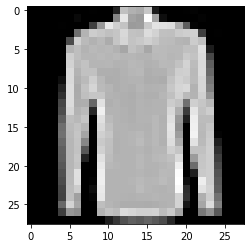

In [ ]:
plt.imshow(x_train[40,:,:,0], cmap='gray')

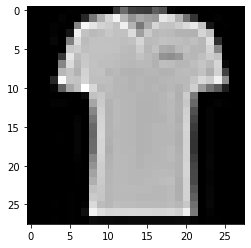

In [ ]:
plt.imshow(x_train[9981,:,:,0], cmap='gray')

In [ ]:
from google.colab import drive
drive.mount('/g')

Mounted at /g


In [ ]:
import cv2
image = cv2.imread('/g/My Drive/ML_DL_202002/tshirt1.png')

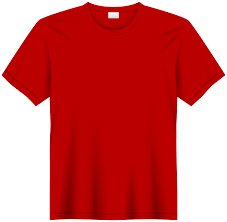

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
test1 =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
test1.shape

(222, 227)

In [ ]:
test1=cv2.resize(test1, (28,28))

In [ ]:
cv2_imshow(test1)

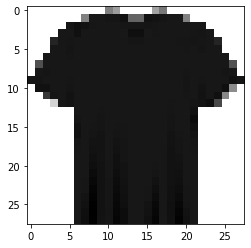

In [ ]:
plt.imshow(test1, cmap='gray')

In [ ]:
test1_inv = cv2.bitwise_not(test1)

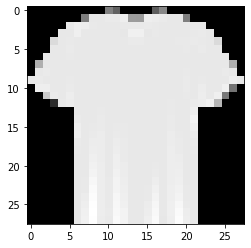

In [ ]:
plt.imshow(test1_inv, cmap = 'gray')

In [ ]:
test1_inv.shape

(28, 28)

In [ ]:
test = np.array([test1_inv, test1])

In [ ]:
test.shape

(2, 28, 28)

In [ ]:
test = np.expand_dims(test, axis=3)

In [ ]:
pred=model.predict(test)

In [ ]:
pred.argmax(axis=1)

array([6, 2])

In [ ]:
test = test/255

In [ ]:
pred=model.predict(test)

In [ ]:
pred.argmax(axis=1)

array([0, 6])

In [ ]:
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']   

In [ ]:
image2 = cv2.imread('/g/My Drive/ML_DL_202002/shirt1.png')

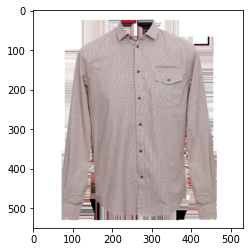

In [ ]:
plt.imshow(image2, cmap = 'gray')

In [ ]:
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY )

In [ ]:
test2 = cv2.resize(image2, (28,28))

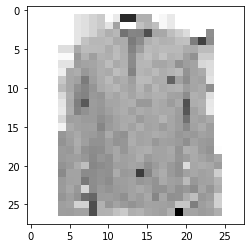

In [ ]:
plt.imshow(test2, cmap='gray')

In [ ]:
test2_inv = cv2.bitwise_not(test2)

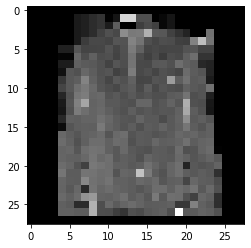

In [ ]:
plt.imshow(test2_inv, cmap='gray')

In [ ]:
test2_scale1 = test2/255

In [ ]:
test2_scale2 = test2/test2.max()

In [ ]:
tests2 = np.array([test2_scale1, test2_scale2])
tests2 = np.expand_dims(tests2, axis=3)

In [ ]:
pred2=model.predict(tests2)

In [ ]:
pred2.argmax(axis=1)

array([6, 6])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(    
    shear_range=20,
    horizontal_flip=True)

In [ ]:
batches=datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
x_batch, y_batch = next(batches)

In [ ]:
x_batch.max()

0.9999386

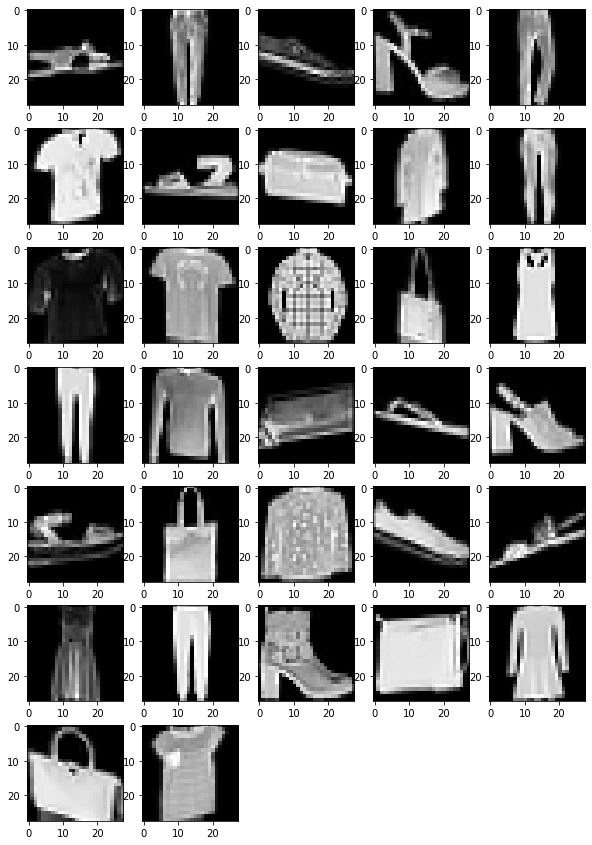

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(x_batch[i,:,:,0], cmap='gray')

In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train/255
x_test = x_test/255

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(    
    shear_range=20,
    horizontal_flip=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

epochs = 20
callbacks = callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
histoy = model.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=epochs, callbacks = callbacks,
          validation_data=(x_test, y_test))

(60000, 28, 28) (60000,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          

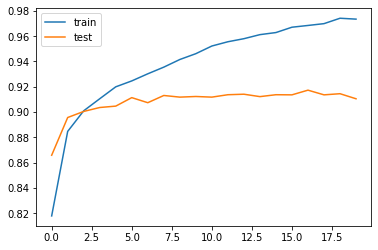

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train/255
x_test = x_test/255

model = models.Sequential()
model.add(layers.Conv2D(64,(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(    
    shear_range=20,
    horizontal_flip=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

epochs = 20
callbacks = callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
histoy = model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=epochs, callbacks = callbacks,
          validation_data=(x_test, y_test))

(60000, 28, 28) (60000,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1639424   
_________________________________________________________________
dropout_2 (Dropout)          

fashion mnist 정확도 관련

https://paperswithcode.com/sota/image-classification-on-fashion-mnist